<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_CD_2024/blob/main/IMT_ex_Htestes_solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# Escolha os testes mais adequados aqui

### **Testes de normalidade**

* Pressupostos: não há
* Foco: Normalidade

> * **Shapiro-Wild**, `shapiro(a)`, *H0 = Normal*

> * **Levene**, `levene(a,b)`, *H0 = Variâncias Iguais*

### **Testes paramétricos**

* Pressupostos: normalidade, continuidade, homocedasticidade
* Foco: Comparação de Médias

> * **ttest**, `ttest_ind(a,b,alternative="two-sided"|"greater"|"less")`, *distribuição t-Student, amostras*

> * **ztest**, `ztest(a,b,alternative="two-sided"|"greater"|"less")`, *distribuição normal, população*

> * **ttest_1samp**, `ttest_1samp(a,valor,alternative="two-sided"|"greater"|"less")`, *uma única amostra*

> * **ttest_rel**, `ttest_rel(a,b,alternative="two-sided"|"greater"|"less")`, *amostras pareadas*

> * **t de Welch**, `ttest_ind(a,b,equal_var=False)`, *variâncias ou amostras de tamanho diferente*


### **Testes não paramétricos**

* Pressupostos: não pressupõe nenhuma distribuição dos dados
* Foco: Comparação de Medianas e Distribuições iguais

> * **Wilcoxon**, `wilcoxon(a,b,alternative="two-sided"|"greater"|"less")`, * amostras têm medianas iguais? amostras de mesmo tamanho.*

> * **Mann-Whitney U**, `mannwhitneyu(a,b,alternative="two-sided"|"greater"|"less")`, *amostras de tamanho diferente, amostras têm distribuições iguais?*

### **Teste $\chi^2$**

* Pressupostos: variáveis categóricas
* Foco: variáveis independentes? (H0)

> * **chisquare**, `chi2_contingency(contingency_table)`, *empregue `pd.crosstab()` para gerar tabelas de contigência. $M \times N$-classes podem ser empregadas.*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
path = 'https://github.com/Rogerio-mack/IMT_CD_2024/raw/main/data/'


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#@markdown gera_df_stats_latex
from IPython.display import display, Latex, HTML
import warnings

def gera_df_stats_latex(df_stats, titulo):

  warnings.filterwarnings('ignore')
  # latex_table = df_stats.style.to_latex(hrules=True)
  latex_table = df_stats.to_latex(index=None)
  # display(Latex(latex_table))

  latex_table = latex_table.replace('tabular','array')
  latex_table = latex_table.replace('toprule','hline')
  latex_table = latex_table.replace('midrule','hline')
  latex_table = latex_table.replace('bottomrule','hline')

  latex_table = '\\textbf{' + titulo + '} \\\\' + latex_table

  warnings.filterwarnings('default')
  return latex_table

# **CASE: Treinamento**

Você está interessado em saber se um treinamento realizado com os funcionários da sua companhia será de fato efetivo para diminuir o tempo de realização de uma determinada tarefa realizada pelos funcionários. Você então coleta 30 amostras do tempo dessa tarefa para os funcionários, antes e depois do treinamento.



In [ ]:
df = pd.read_csv(path + 'task_before_after.csv',index_col=0)
df.head()

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
After Hours,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,...,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00
Before Hours,1.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,...,0.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,1.00
After Min,14.64,58.02,56.29,3.17,40.72,51.09,48.63,58.78,9.89,29.93,...,5.57,4.28,35.91,51.02,53.69,47.79,53.19,46.22,17.76,13.23
Before Min,13.42,44.20,56.20,6.38,14.60,17.13,21.64,3.23,10.58,51.10,...,56.87,25.22,0.73,4.80,8.86,3.78,45.53,51.10,11.56,21.42


# Q0.

Antes de tudo verifique os pressupostos dos testes paramétricos. Faça gráficos de distribuição e o `qqplot`.

Qual a conclusão dos testes? Que testes devemos **idealmente** aplicar? Paramétricos ou não paramétricos.



In [ ]:
df_antes = df[(df.index == 'Before Hours') | (df.index == 'Before Min')]
antes = 60 * df_antes.iloc[0,:] + df_antes.iloc[1,:]

df_depois = df[(df.index == 'After Hours') | (df.index == 'After Min')]
depois = 60 * df_depois.iloc[0,:] + df_depois.iloc[1,:]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


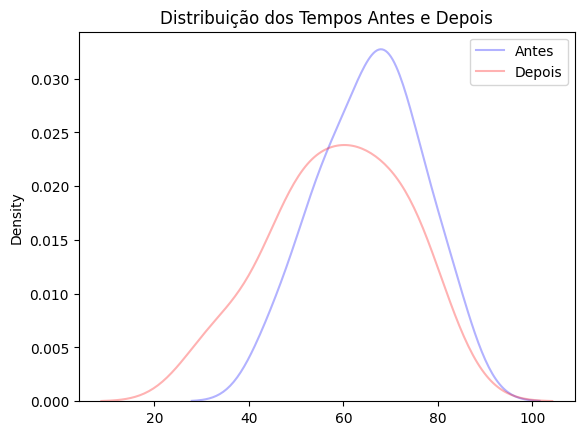

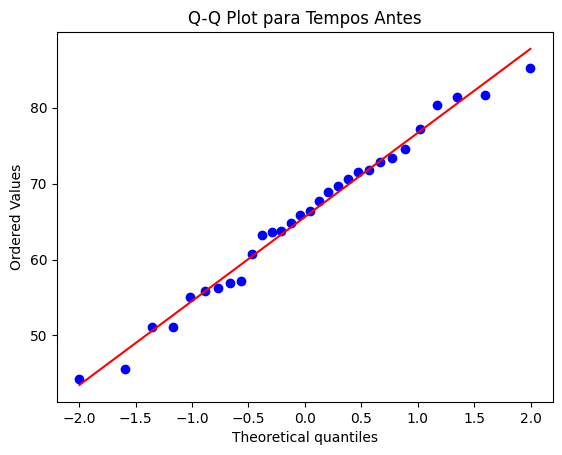

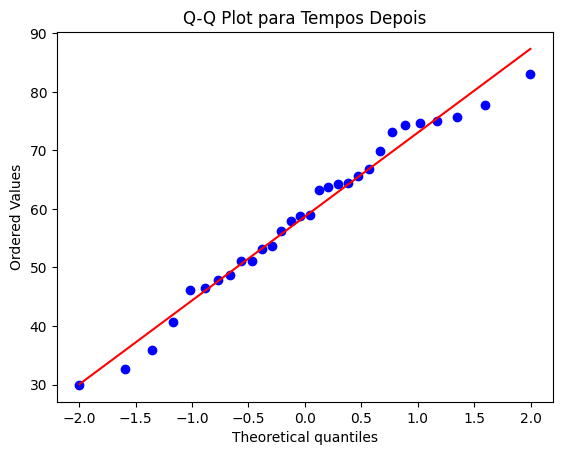

In [ ]:
import scipy.stats as stats

sns.kdeplot(antes, color='blue', label='Antes',alpha=0.3)
sns.kdeplot(depois, color='red', label='Depois',alpha=0.3)
plt.legend()
plt.title('Distribuição dos Tempos Antes e Depois')
plt.show()

# Q-Q Plot
stats.probplot(antes, dist="norm", plot=plt)
plt.title('Q-Q Plot para Tempos Antes')
plt.show()

stats.probplot(depois, dist="norm", plot=plt)
plt.title('Q-Q Plot para Tempos Depois')
plt.show()


In [ ]:
stat, p_valor = stats.shapiro(antes)

print('Teste Antes:')
print("Estatística Shapiro-Wilk:", stat)
print("Valor p:", p_valor)
print()

if p_valor < 0.05:
    print("Dados não têm distribuição normal")
else:
    print("Dados têm distribuição normal")

print()

stat, p_valor = stats.shapiro(depois)

print('Teste Depois:')
print("Estatística Shapiro-Wilk:", stat)
print("Valor p:", p_valor)
print()

if p_valor < 0.05:
    print("Dados não têm distribuição normal")
else:
    print("Dados têm distribuição normal")

print()

stat, p_valor = stats.levene(antes, depois)

print('Variância:')
print("Estatística Levene:", stat)
print("Valor p:", p_valor)
print()

if p_valor < 0.05:
    print("Dados não têm variâncias estatisticamente iguais.")
else:
    print("Dados têm variâncias estatisticamente iguais.")


Teste Antes:
Estatística Shapiro-Wilk: 0.9798098802566528
Valor p: 0.8204753398895264

Dados têm distribuição normal

Teste Depois:
Estatística Shapiro-Wilk: 0.9724714756011963
Valor p: 0.6087737083435059

Dados têm distribuição normal

Variância:
Estatística Levene: 2.2478767676263374
Valor p: 0.13922162999485826

Dados têm variâncias estatisticamente iguais.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Q1.

Selecione o teste adequado e verifique se o treinamento.

a. Altera o tempo para realização da tarefa

b. De fato, reduz o tempo para realização da tarefa



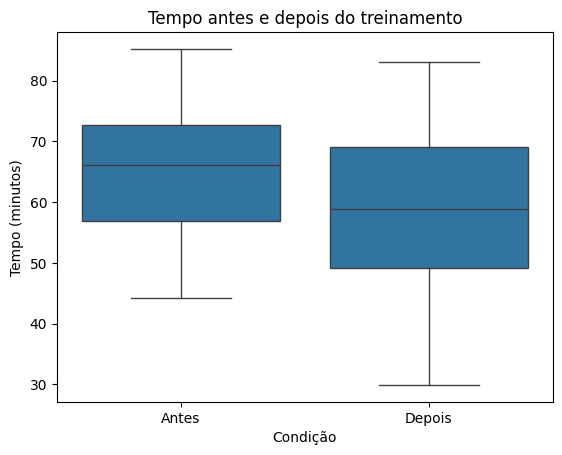

In [ ]:
df_boxplot = pd.DataFrame({
    'Tempo': np.concatenate([antes, depois]),
    'Condição': ['Antes'] * len(antes) + ['Depois'] * len(depois)})

sns.boxplot(x='Condição', y='Tempo', data=df_boxplot)
plt.xlabel('Condição')
plt.ylabel('Tempo (minutos)')
plt.title('Tempo antes e depois do treinamento')
plt.show()


In [ ]:
from scipy.stats import ttest_rel

stat, p_valor = ttest_rel(antes, depois)

print("Estatística t:", stat)
print("Valor p:", p_valor)
print()

if p_valor < 0.05:
    print("Rejeitamos a hipótese nula - as médias são estatisticamente diferentes.")
else:
    print("Não rejeitamos a hipótese nula - não há evidências suficientes para afirmar diferença nas médias.")


Estatística t: 2.695657667423908
Valor p: 0.011569495148982404

Rejeitamos a hipótese nula - as médias são estatisticamente diferentes.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from scipy.stats import ttest_rel

stat, p_valor = ttest_rel(depois, antes, alternative='less')

print("Estatística t:", stat)
print("Valor p:", p_valor)
print()

if p_valor < 0.05:
    print("Rejeitamos a hipótese nula (depois >= antes) - as médias são estatisticamente menores após o treinamento.")
else:
    print("Não rejeitamos a hipótese nula (depois < antes)- não há evidências suficientes para afirmar que as médias são estatisticamente menores após o treinamento.")

Estatística t: -2.695657667423908
Valor p: 0.005784747574491202

Rejeitamos a hipótese nula (depois >= antes) - as médias são estatisticamente menores após o treinamento.


# Q2.

Verifique as mesmas hipóteses acima, no caso de:

a. O tempo após o treinamento ser apenas 3% maior. As conclusões são as mesmas?

b. Se a amostra não fosse pareada, mas de 30 funcionários quaisquer. Ainda assim teríamos a mesma conclusão? Você pode concluir que o teste não pareado pode concluir que os tempos são menores quando o teste pareado não?

c. As médias antes ou depois têm média estatisticamente iguais a 60min?



In [ ]:
from scipy.stats import ttest_rel

stat, p_valor = ttest_rel(1.03*depois, antes)

print("Estatística t:", stat)
print("Valor p:", p_valor)
print()

if p_valor < 0.05:
    print("Rejeitamos a hipótese nula - as médias são estatisticamente diferentes.")
else:
    print("Não rejeitamos a hipótese nula - não há evidências suficientes para afirmar diferença nas médias.")


Estatística t: -1.9671229254542215
Valor p: 0.05880144876227127

Não rejeitamos a hipótese nula - não há evidências suficientes para afirmar diferença nas médias.


In [ ]:
from scipy.stats import ttest_rel

stat, p_valor = ttest_rel(1.03*depois, antes, alternative='less')

print("Estatística t:", stat)
print("Valor p:", p_valor)
print()

if p_valor < 0.05:
    print("Rejeitamos a hipótese nula (depois >= antes) - as médias são estatisticamente menores após o treinamento.")
else:
    print("Não rejeitamos a hipótese nula (depois < antes)- não há evidências suficientes para afirmar que as médias são estatisticamente menores após o treinamento.")

Estatística t: -1.9671229254542215
Valor p: 0.029400724381135637

Rejeitamos a hipótese nula (depois >= antes) - as médias são estatisticamente menores após o treinamento.


In [ ]:
from scipy.stats import ttest_ind

stat, p_valor = ttest_ind(depois, antes, alternative='less')

print("Estatística t:", stat)
print("Valor p:", p_valor)
print()

if p_valor < 0.05:
    print("Rejeitamos a hipótese nula (depois >= antes) - as médias são estatisticamente menores após o treinamento.")
else:
    print("Não rejeitamos a hipótese nula (depois < antes)- não há evidências suficientes para afirmar que as médias são estatisticamente menores após o treinamento.")

Estatística t: -2.154065304861309
Valor p: 0.017701091007763025

Rejeitamos a hipótese nula (depois >= antes) - as médias são estatisticamente menores após o treinamento.


Teste ind: 0.017701091007763025
Teste rel: 0.005784747574491202


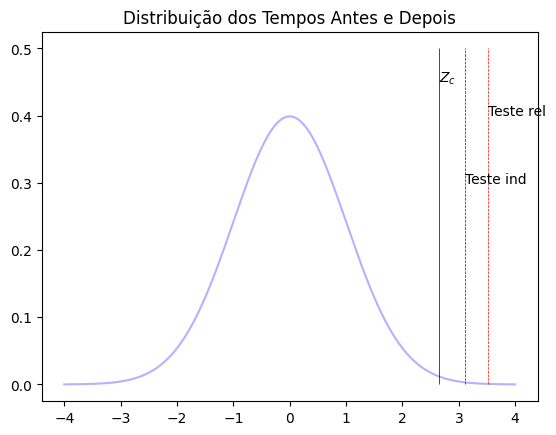

In [ ]:
from scipy.stats import ttest_ind, ttest_rel, norm

_, p_valor_ind = ttest_ind(depois, antes, alternative='less')
_, p_valor_rel = ttest_rel(depois, antes, alternative='less')

print("Teste ind:", p_valor_ind)
print("Teste rel:", p_valor_rel)

sns.lineplot(x=np.linspace(-4,4,1000),y=norm.pdf(np.linspace(-4,4,1000)), color='blue', alpha=0.3)

plt.vlines(1-norm.ppf(p_valor_ind), ymin=0, ymax=0.5, colors='blue', linestyles='dashed',label='Teste ind',lw=0.5)
plt.vlines(1-norm.ppf(p_valor_rel), ymin=0, ymax=0.5, colors='red', linestyles='dashed',label='Teste rel',lw=0.5)
plt.vlines(1-norm.ppf(0.05), ymin=0, ymax=0.5, colors='k', label='Critical',lw=0.5)

plt.text(1-norm.ppf(p_valor_ind), 0.3,'Teste ind')
plt.text(1-norm.ppf(p_valor_rel), 0.4,'Teste rel')
plt.text(1-norm.ppf(0.05), 0.45,'$Z_c$')

# plt.legend(loc='upper left')
plt.title('Distribuição dos Tempos Antes e Depois')
plt.show()



Portanto,

> Se test_ind rejeita $\longrightarrow$ test_rel rejeita

> Se test_rel rejeita $\not \longrightarrow$ test_ind rejeita

E, portanto, aplicando um teste errado (não pareado para amostras pareadas) posso estar gerando *falsos positivos*.

In [ ]:
from scipy.stats import ttest_1samp

print('antes')
print()

stat, p_valor = ttest_1samp(antes, 60)

print("Estatística t:", stat)
print("Valor p:", p_valor)
print()

if p_valor < 0.05:
    print("Rejeitamos a hipótese nula, o valor não é igual.")
else:
    print("Não rejeitamos a hipótese nula, não há evidências suficientes para afirmar que o valor é igual.")

print('depois')
print()

stat, p_valor = ttest_1samp(depois, 60)

print("Estatística t:", stat)
print("Valor p:", p_valor)
print()

if p_valor < 0.05:
    print("Rejeitamos a hipótese nula, o valor não é igual.")
else:
    print("Não rejeitamos a hipótese nula, não há evidências suficientes para afirmar que o valor é igual.")

antes

Estatística t: 2.8669045541942624
Valor p: 0.007643249072274749

Rejeitamos a hipótese nula, o valor não é igual.
depois

Estatística t: -0.5116334726492409
Valor p: 0.6127816149730594

Não rejeitamos a hipótese nula, não há evidências suficientes para afirmar que o valor é igual.


# **CASE: Game Analysis**

Um pesquisador está investigando a experiência de usuários em um jogo com diferentes dispositivos. Para isso ele selecionou alguns alunos da Universidade para testar os jogos. Cada jogador responde um questionário prévio com informações do seu perfil, realiza uma ou até 3 jogadas com os dispositivos *Skate*, *Joystick* e *Teclado*. Após as jogadas com cada dispositivo ele responde um questionário padrão de experiência do usuário cujo o resultado já se encontra aqui pré-processado.

In [ ]:
df_games = pd.read_csv(path + 'df_games.csv')
df_post_games_Q = pd.read_csv(path + 'df_post_games_Q.csv')
df_pre_games_Q = pd.read_csv(path + 'df_pre_games_Q.csv')

display(df_games.head())
display(df_post_games_Q.head())
display(df_pre_games_Q.head())

,RA,pontuacao,tempo_obstaculo,tempo_total,device
0,21505616,2,12.44,12.44,skate
1,21505616,13,42.01,54.45,skate
2,21505616,26,49.09,103.54,skate
3,32143621,0,5.45,5.45,skate
4,32143621,3,13.99,19.44,skate


,RA,device,Positive_Experience,Negative_Experience,Tiredness,Returning_to_Reality
0,21505616,joystick,5.000000,1.333333,1.0,2.333333
1,21505616,keyboard,4.666667,2.000000,1.0,2.333333
2,21505616,skate,3.166667,2.833333,1.0,1.666667
3,23513365,joystick,5.000000,1.000000,1.0,2.333333
4,23513365,keyboard,5.000000,1.000000,1.0,2.333333


,Carimbo de data/hora,RA,Data de nascimento,Gênero,Frequência que anda de skate,Frequência que usa jogos de computador,Frequência que usa jogos de console (Xbox / Playstation / Wii),Frequência que usa jogos em dispositivos móveis (smartphone e/ou tablet),Gênero de jogo preferido
0,2023-08-21 16:47:52.279,42118816,2003-06-07,Feminino,Nunca,Regularmente (algumas vezes por semana),Regularmente (algumas vezes por semana),Nunca,"Ação e aventura, RPG, Simulação, Corrida, Estr..."
1,2023-08-22 13:49:56.703,42145333,2000-11-26,Masculino,Raramente (algumas vezes por ano),Regularmente (algumas vezes por semana),Raramente (algumas vezes por ano),Regularmente (algumas vezes por semana),"Ação e aventura, RPG, Estratégia"
2,2023-08-22 14:15:17.455,42326321,2004-11-29,Masculino,Nunca,Ocasionalmente (algumas vezes por mês),Raramente (algumas vezes por ano),Raramente (algumas vezes por ano),Esporte
3,2023-08-22 14:40:49.151,32339623,2004-07-13,Masculino,Nunca,Frequente (todos os dias),Regularmente (algumas vezes por semana),Raramente (algumas vezes por ano),"Ação e aventura, RPG, Estratégia, MOBA"
4,2023-08-22 15:08:53.471,42305535,2005-09-09,Masculino,Nunca,Ocasionalmente (algumas vezes por mês),Nunca,Ocasionalmente (algumas vezes por mês),RPG


# Q3.

**Há diferença de pontuação entre homens e mulheres?**

1. Escolha e execute 1 teste paramétrico e 1 não paramétrico mais adequado, selecionando o mais adequado de cada categoria.
2. Produza uma tabela como abaixo, com a análise da pontuação de homes e mulheres para todos e por dispositivos.

### **Há diferença de pontuação entre os devices?**

Por que não posso responder ao mesmo tipo de pergunta para homens e mulheres, para os devices?




In [ ]:
df = pd.merge(df_games, df_pre_games_Q[['RA','Gênero']], how='inner', on='RA')
df.head()

,RA,pontuacao,tempo_obstaculo,tempo_total,device,Gênero
0,21505616,2,12.44,12.44,skate,Masculino
1,21505616,13,42.01,54.45,skate,Masculino
2,21505616,26,49.09,103.54,skate,Masculino
3,21505616,0,5.73,5.73,joystick,Masculino
4,21505616,0,3.23,8.96,joystick,Masculino


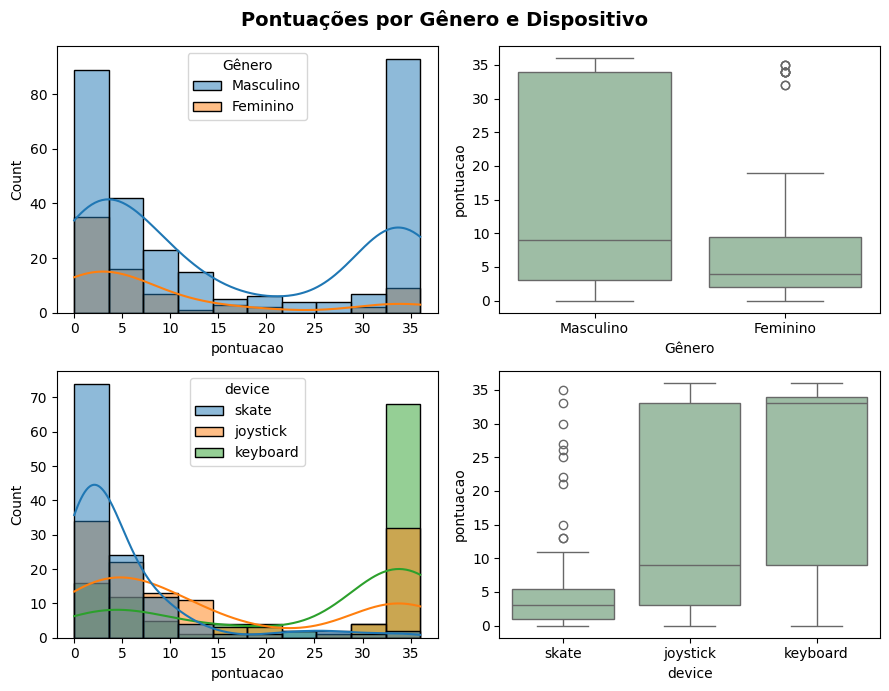

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(9,7))

sns.histplot(x='pontuacao',data=df,hue='Gênero',kde=True,ax=ax[0,0],alpha=0.5)
sns.boxplot(x='Gênero', y='pontuacao', data=df, color='#99c2a2',ax=ax[0,1])

sns.histplot(x='pontuacao',data=df,hue='device',kde=True,ax=ax[1,0],alpha=0.5)
sns.boxplot(x='device', y='pontuacao', data=df, color='#99c2a2',ax=ax[1,1])

plt.suptitle('Pontuações por Gênero e Dispositivo',fontsize=14,weight='bold')

plt.tight_layout()
plt.show()

In [ ]:
df[df['Gênero'] == 'Feminino']['pontuacao'].mean(), df[df['Gênero'] == 'Masculino']['pontuacao'].mean()

(8.853333333333333, 15.725694444444445)

In [ ]:
df[df['Gênero'] == 'Feminino']['pontuacao'].var(), df[df['Gênero'] == 'Masculino']['pontuacao'].var()

(128.55927927927925, 200.18581833139763)

In [ ]:
from scipy.stats import mannwhitneyu

results = pd.DataFrame(columns=['device','stat Mann-Whitney','p-value','H0-Rejected'])

stat, p_valor = mannwhitneyu(df[df['Gênero'] == 'Feminino']['pontuacao'], df[df['Gênero'] == 'Masculino']['pontuacao'])
results.loc[len(results)] = ['all',np.round(stat,4),np.round(p_valor,4),p_valor < 0.05]

for device in df.device.unique():
  select = df['device'] == device
  stat, p_valor = mannwhitneyu(df[(df['Gênero'] == 'Feminino') & (select)]['pontuacao'], df[(df['Gênero'] == 'Masculino') & (select)]['pontuacao'])
  results.loc[len(results)] = [device,np.round(stat,4),np.round(p_valor,4),p_valor < 0.05]

  print('Device =', device)
  print("Estatística:", stat)
  print("Valor p:", p_valor)
  if p_valor < 0.05:
      print("Rejeitamos a hipótese nula - as distribuições dos dados são estatisticamente diferentes.")
  else:
      print("Não rejeitamos a hipótese nula - não há evidências suficientes para afirmar diferença nas distribuições dos dados.")
  print()

results

Device = skate
Estatística: 727.0
Valor p: 0.003047546798124285
Rejeitamos a hipótese nula - as distribuições dos dados são estatisticamente diferentes.

Device = joystick
Estatística: 792.0
Valor p: 0.0020410959936567282
Rejeitamos a hipótese nula - as distribuições dos dados são estatisticamente diferentes.

Device = keyboard
Estatística: 871.5
Valor p: 0.08760850621852327
Não rejeitamos a hipótese nula - não há evidências suficientes para afirmar diferença nas distribuições dos dados.



,device,stat Mann-Whitney,p-value,H0-Rejected
0,all,7853.0,0.0003,True
1,skate,727.0,0.0030,True
2,joystick,792.0,0.0020,True
3,keyboard,871.5,0.0876,False


In [ ]:
latex_results_scores = gera_df_stats_latex(results,'Game Analysis')
display(Latex(latex_results_scores))

<IPython.core.display.Latex object>

In [ ]:
from scipy.stats import ttest_ind

results = pd.DataFrame(columns=['device','stat Welch','p-value','H0-Rejected'])

stat, p_valor = ttest_ind(df[df['Gênero'] == 'Feminino']['pontuacao'], df[df['Gênero'] == 'Masculino']['pontuacao'],equal_var=False)
results.loc[len(results)] = ['all',np.round(stat,4),np.round(p_valor,4),p_valor < 0.05]

for device in df.device.unique():
  select = df['device'] == device
  stat, p_valor = ttest_ind(df[(df['Gênero'] == 'Feminino') & (select)]['pontuacao'], df[(df['Gênero'] == 'Masculino') & (select)]['pontuacao'],equal_var=False)
  results.loc[len(results)] = [device,np.round(stat,4),np.round(p_valor,4),p_valor < 0.05]

  print('Device =', device)
  print("Estatística:", stat)
  print("Valor p:", p_valor)
  if p_valor < 0.05:
      print("Rejeitamos a hipótese nula - as médias são estatisticamente diferentes.")
  else:
      print("Não rejeitamos a hipótese nula - não há evidências suficientes para afirmar diferença nas médias.")
  print()

results

Device = skate
Estatística: -4.268619881353005
Valor p: 4.0376314103786296e-05
Rejeitamos a hipótese nula - as médias são estatisticamente diferentes.

Device = joystick
Estatística: -4.1890688500050794
Valor p: 8.123471311224853e-05
Rejeitamos a hipótese nula - as médias são estatisticamente diferentes.

Device = keyboard
Estatística: -2.625970397131684
Valor p: 0.012988088632962368
Rejeitamos a hipótese nula - as médias são estatisticamente diferentes.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,device,stat Welch,p-value,H0-Rejected
0,all,-4.4276,0.0000,True
1,skate,-4.2686,0.0000,True
2,joystick,-4.1891,0.0001,True
3,keyboard,-2.6260,0.0130,True


In [ ]:
latex_results_scores = gera_df_stats_latex(results,'Game Analysis')
display(Latex(latex_results_scores))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Latex object>

# Q4.

**Há diferença na 1a preferência ou na maior de percepção de desafio entre homens e mulheres ao experimentaram o jogo?**

Os usuários, após a experiência com o jogo, também foram convidados a dar a sua preferência e percepção de desafio ao jogo classificando cada dispositivo de 1 (maior preferência e desafio) a 3 (menores).








In [ ]:
df_pos_games_Q2 = pd.read_csv(path + 'df_pos_games_Q2.csv')
df_pos_games_Q2.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date_time,RA,joystick_p,keyboard_p,skate_p,joystick_d,keyboard_d,skate_d
0,2023-08-22 14:12:44.482,42145333,3,2,1,3,3,1
1,2023-08-22 15:05:52.265,32339623,3,2,1,2,3,1
2,2023-08-22 15:26:46.963,42305535,1,2,3,2,1,3
3,2023-08-22 15:47:32.495,42308720,2,3,1,2,3,1
4,2023-09-04 11:45:23.579,32229011,2,1,3,2,3,1


In [ ]:
df = df_pos_games_Q2

df['preference'] = (df[[x for x in df.columns if '_p' in x]] == 1).idxmax(axis=1)
df['challenger'] = (df[[x for x in df.columns if '_d' in x]] == 1).idxmax(axis=1)

df = pd.merge(df[['RA','preference','challenger']], df_pre_games_Q[['RA','Gênero']], how='inner', on='RA')

df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,RA,preference,challenger,Gênero
0,42145333,skate_p,skate_d,Masculino
1,32339623,skate_p,skate_d,Masculino
2,42305535,joystick_p,keyboard_d,Masculino
3,42308720,skate_p,skate_d,Masculino
4,32229011,keyboard_p,skate_d,Masculino


In [ ]:
from scipy.stats import chi2_contingency

results = pd.DataFrame(columns=['Related','chi2','p-value','Dependent'])

for tipo in ['preference','challenger']:
  contingency_table = pd.crosstab(df['Gênero'], df[tipo])

  # display('Tabela de Contingência: ', contingency_table)
  # display(contingency_table)

  chi2, p_value, dof, expected = chi2_contingency(contingency_table)

  if p_value < 0.05:
      print(f"Rejeitamos a hipótese nula - Há evidências de que o gênero influencia em {tipo}. Chi-square: {chi2:.6f} p-value = {p_value:.6f}")
  else:
      print(f"Não rejeitamos a hipótese nula - Não há evidências de que o gênero influencia em {tipo}. Chi-square: {chi2:.6f} p-value = {p_value:.6f}")

  results.loc[len(results)] = [tipo,np.round(chi2,4),np.round(p_value,4),p_value < 0.05]

print()


Não rejeitamos a hipótese nula - Não há evidências de que o gênero influencia em preference. Chi-square: 0.158307 p-value = 0.923898
Não rejeitamos a hipótese nula - Não há evidências de que o gênero influencia em challenger. Chi-square: 1.786466 p-value = 0.409330



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bo

In [ ]:
latex_results = gera_df_stats_latex(results,'Influência do Gênero na Preferência e Percepção de Desafio')
display(Latex(latex_results))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Latex object>